<a href="https://colab.research.google.com/github/acse-srm3018/FoamCO2Prediction/blob/main/foamprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [1]:
%pylab inline
import pandas as pd # for manipulating tabular data
import matplotlib.pyplot as plt # for visualisation
import seaborn as sns # for user friendly visualisation
import numpy as np # for numerical python functionality

Populating the interactive namespace from numpy and matplotlib


# 1. Linear regression

## 1.1 Imports

In [2]:
from sklearn.linear_model import LinearRegression # implementation of linear regression
from sklearn.model_selection import train_test_split # for creating a train and test set
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # for evaluating our model

## 1.2 Loading the data

# download the data
!wget https://github.com/acse-srm3018/FoamCO2Prediction/blob/main/Data.xlsx

In [4]:
data = pd.read_excel('/content/Data.xlsx')

In [5]:
data.head()

,foam type,initial oil in place,pore volume,Porosity,Permeability,PV,RF,oil flow Rate
0,1.0,97,43.5,34.8,9.0,0.5,5.0,0.190
1,1.0,97,43.5,34.8,9.0,0.7,7.0,0.225
2,1.0,97,43.5,34.8,9.0,1.0,9.5,0.330
3,1.0,97,43.5,34.8,9.0,1.3,11.0,0.075
4,1.0,97,43.5,34.8,9.0,1.7,12.5,0.050


## 1.3 Dimensions and features

In [6]:
data.shape

(213, 8)

In [7]:
data.columns

Index(['foam type', 'initial oil in place', 'pore volume', 'Porosity',
       'Permeability', 'PV', 'RF', 'oil flow Rate'],
      dtype='object')

1.4 Data types

In [8]:
data.info

<bound method DataFrame.info of      foam type  initial oil in place  pore volume  ...    PV    RF  oil flow Rate
0          1.0                    97         43.5  ...   0.5   5.0       0.190000
1          1.0                    97         43.5  ...   0.7   7.0       0.225000
2          1.0                    97         43.5  ...   1.0   9.5       0.330000
3          1.0                    97         43.5  ...   1.3  11.0       0.075000
4          1.0                    97         43.5  ...   1.7  12.5       0.050000
..         ...                   ...          ...  ...   ...   ...            ...
208        5.0                    96         49.0  ...  33.0  40.1       0.001000
209        5.0                    96         49.0  ...  34.0  40.3       0.000400
210        5.0                    96         49.0  ...  34.8  40.5       0.000014
211        5.0                    96         49.0  ...  35.3  40.6       0.000000
212        5.0                    96         49.0  ...  36.3  40.6

### One-hot encoding

Some of these data types are clearly categorical. In order to use categorical features in ML models we would have to [one-hot encode them](https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/). This is easy enough to do using the `pd.get_dummies()` function. For more information, [here](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html#) is the documentation. For now, we will simply deal with the numerical features.

In [9]:
# for now we are only going to consider numerical data-types 
data_num = data.select_dtypes(include = 'number')
data_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   foam type             212 non-null    float64
 1   initial oil in place  213 non-null    int64  
 2   pore volume           213 non-null    float64
 3   Porosity              213 non-null    float64
 4   Permeability          213 non-null    float64
 5   PV                    212 non-null    float64
 6   RF                    213 non-null    float64
 7   oil flow Rate         213 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 13.4 KB


## 1.6 Visualisation

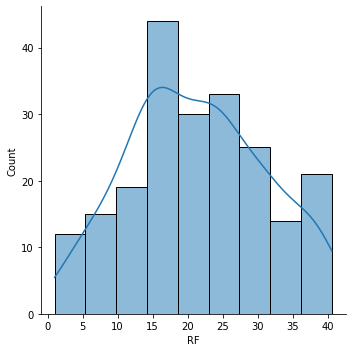

In [10]:
# distribution of target variable
sns.displot(data_num['RF'], kde=True)

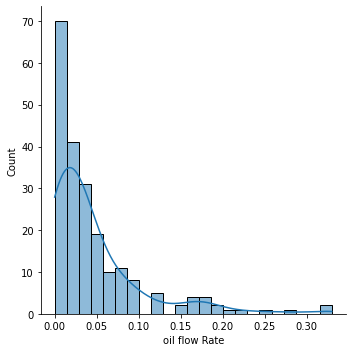

In [11]:
# distribution of target variable
sns.displot(data_num['oil flow Rate'], kde=True)